In [8]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('Auto_Dataset.csv',index_col = None)

In [18]:
df.head(2)

,dateCrawled,Name,Price,Ab_test,Vehicle_type,Registration_year,Gearbox,Power_PS,Model,Kilometer,Registration_month,fuel_type,brand,Unrepaired_damage,Date_created,Postal_code,Last_seen
0,2016-03-17 16:54:00,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,91074,2016-03-17 17:40:00
1,2016-03-31 17:25:00,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,2016-06-04 10:17:00


In [19]:
df.shape

(248058, 17)

1) Perform general Data analysis.\
2) Can you tell me the Distribution of Vehicles based on Year of
Registration with the help of a plot.\
3) Create a plot based on the Variation of the price range by the
vehicle type
4) Find out Total count of vehicles by type available on ebay for
sale.As well as create a visualization for the client
5) Is there any relationship between dollar_price and kilometer?
(Explain with appropriate analysis)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248058 entries, 0 to 248057
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   dateCrawled         248058 non-null  object
 1   Name                248058 non-null  object
 2   Price               248058 non-null  int64 
 3   Ab_test             248058 non-null  object
 4   Vehicle_type        248058 non-null  object
 5   Registration_year   248058 non-null  int64 
 6   Gearbox             248058 non-null  object
 7   Power_PS            248058 non-null  int64 
 8   Model               248058 non-null  object
 9   Kilometer           248058 non-null  int64 
 10  Registration_month  248058 non-null  int64 
 11  fuel_type           248058 non-null  object
 12  brand               248058 non-null  object
 13  Unrepaired_damage   248058 non-null  object
 14  Date_created        248058 non-null  object
 15  Postal_code         248058 non-null  int64 
 16  La

In [22]:
df.describe()

,Price,Registration_year,Power_PS,Kilometer,Registration_month,Postal_code
count,2.480580e+05,248058.000000,248058.000000,248058.000000,248058.000000,248058.000000
mean,8.503314e+03,2003.490063,129.516319,123666.682792,6.221170,52137.035488
std,3.521164e+05,6.430503,62.703541,39927.191820,3.445748,25821.092935
min,1.000000e+00,1910.000000,1.000000,5000.000000,0.000000,1067.000000
25%,1.690000e+03,2000.000000,86.000000,100000.000000,3.000000,31582.000000
50%,3.999000e+03,2004.000000,116.000000,150000.000000,6.000000,51467.000000
75%,8.900000e+03,2008.000000,160.000000,150000.000000,9.000000,73072.000000
max,1.000000e+08,2018.000000,1001.000000,150000.000000,12.000000,99998.000000


In [23]:
df.describe(include = 'object')

,dateCrawled,Name,Ab_test,Vehicle_type,Gearbox,Model,fuel_type,brand,Unrepaired_damage,Date_created,Last_seen
count,248058,248058,248058,248058,248058,248058,248058,248058,248058,248058,248058
unique,14861,140966,2,8,2,250,7,39,2,107,16515
top,2016-03-20 18:50:00,BMW_318i,test,limousine,manuell,golf,benzin,volkswagen,nein,2016-03-04,2016-07-04 06:45:00
freq,46,616,128768,73013,189671,20128,159769,51782,223447,9864,516


### Can you tell me the Distribution of Vehicles based on Year of Registration with the help of a plot

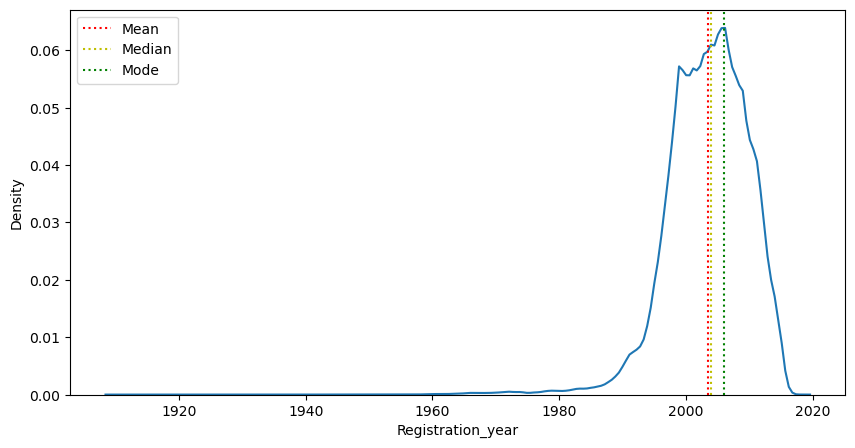

In [25]:
plt.figure(figsize = (10,5))
sns.kdeplot(df['Registration_year'])
plt.axvline(df['Registration_year'].mean(),color = 'r',linestyle = ":",label = "Mean")
plt.axvline(df['Registration_year'].median(),color = 'y',linestyle = ":",label = "Median")
plt.axvline(df['Registration_year'].mode()[0],color = 'g',linestyle = ":",label = "Mode")
plt.legend()
plt.show()

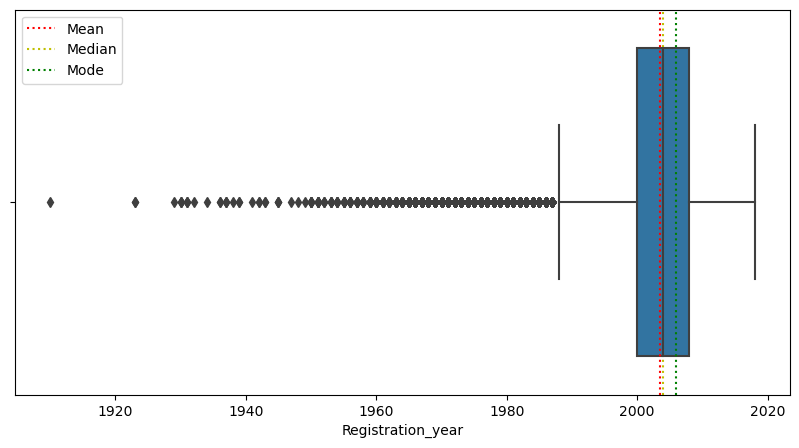

In [26]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df,x = 'Registration_year',color=None)
plt.axvline(df['Registration_year'].mean(),color = 'r',linestyle = ":",label = "Mean")
plt.axvline(df['Registration_year'].median(),color = 'y',linestyle = ":",label = "Median")
plt.axvline(df['Registration_year'].mode()[0],color = 'g',linestyle = ":",label = "Mode")
plt.legend()
plt.show()

In [30]:
print("Mean  : " ,df['Registration_year'].mean())
print("Mode : ",df['Registration_year'].mode())
print("Median  :",df['Registration_year'].median())

Mean  :  2003.4900628078917
Mode :  0    2006
Name: Registration_year, dtype: int64
Median  : 2004.0


Summary :
Distribution of data is left skewed (negative skewness) , Most of vehicle are Registrated in the year 2006
- Mean of the distribution is 2004
- Median of the distribution is 2004
- Mode of the distribution is 2006

###  Create a plot based on the Variation of the price range by the vehicle type

In [13]:
df.groupby('Vehicle_type')['Price'].mean().sort_values(ascending = False)

Vehicle_type
coupe         21997.212377
suv           14233.722107
cabrio        11381.474817
kombi          8792.372477
limousine      8419.751414
bus            7667.570895
andere         4748.899867
kleinwagen     3247.702590
Name: Price, dtype: float64

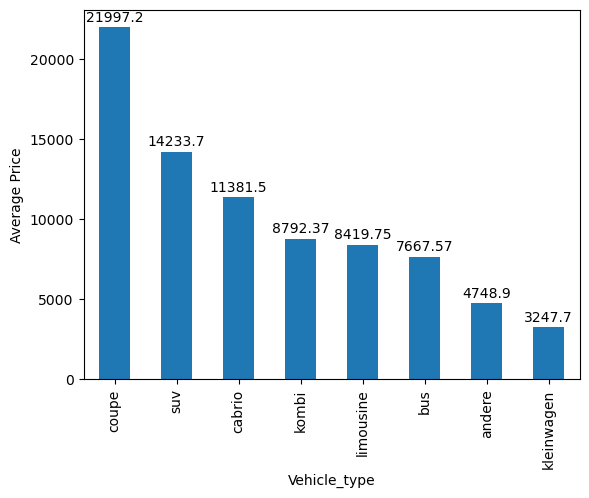

In [23]:
a =df.groupby('Vehicle_type')['Price'].mean().sort_values(ascending = False)
ax =a.plot(kind = "bar")
plt.ylabel('Average Price')
ax.bar_label(ax.containers[0],padding =2,label_type = 'edge',rotation = 0)
plt.show()

In [ ]:
Summary :
    Coupe Vehicle has high Average Price of 21997
    kleinwagen has low Average Price of 3247

### Find out Total count of vehicles by type available on ebay for sale.As well as create a visualization for the client

In [25]:
df['Vehicle_type'].value_counts()

limousine     73013
kleinwagen    55136
kombi         50991
bus           23845
cabrio        17988
coupe         13961
suv           11616
andere         1508
Name: Vehicle_type, dtype: int64

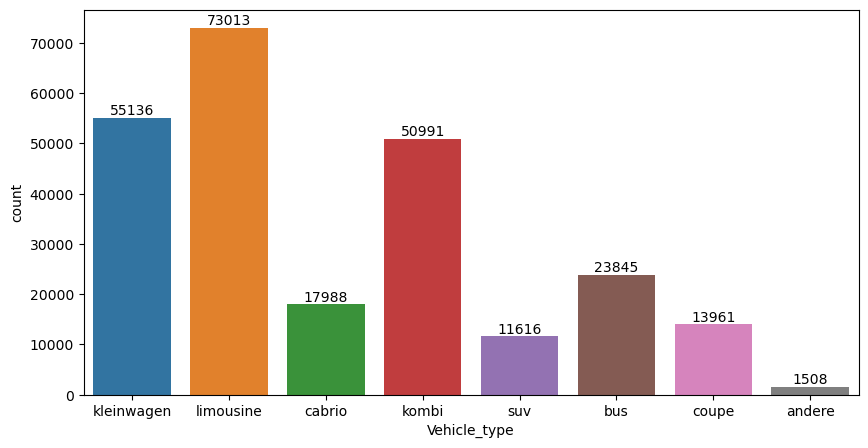

In [28]:
plt.figure(figsize = (10,5))
ax = sns.countplot(data = df,x = 'Vehicle_type')
ax.bar_label(ax.containers[0])
plt.show()

<Axes: ylabel='Vehicle_type'>

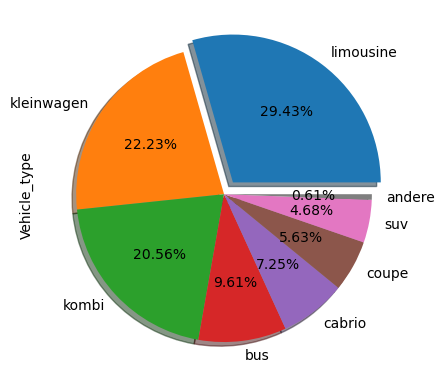

In [30]:
df['Vehicle_type'].value_counts().plot(kind = 'pie',autopct = "%0.2f%%",shadow = True,explode=[0.1,0,0,0,0,0,0,0])

In [ ]:
Summary :
    From the above pie and bar plot , limousine vehicletype is has high sale with  73013 of total sales i.e 29.43% of sales
    andere vehicletype has less sale with 1508 of total sales i.e 0.6% of total sales

## Is there any  relationship between dollar_price and kilometer?

In [32]:
df.head(2)

,dateCrawled,Name,Price,Ab_test,Vehicle_type,Registration_year,Gearbox,Power_PS,Model,Kilometer,Registration_month,fuel_type,brand,Unrepaired_damage,Date_created,Postal_code,Last_seen
0,2016-03-17 16:54:00,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,91074,2016-03-17 17:40:00
1,2016-03-31 17:25:00,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,2016-06-04 10:17:00


In [33]:
df[['Price','Kilometer']].corr(method = "spearman")

,Price,Kilometer
Price,1.000000,-0.452568
Kilometer,-0.452568,1.000000


<Axes: >

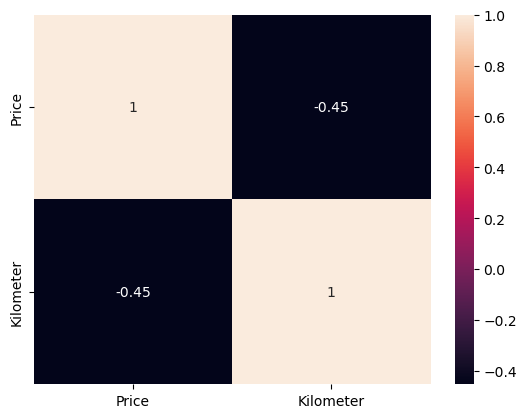

In [35]:
sns.heatmap(df[['Price','Kilometer']].corr(method = "spearman"),annot = True)

In [ ]:
Summary :
    Covariance  measure shows there is negative relationship between the kilometer and price 
    Heatmap shows the correlation betweeen them.
    A Spearmans correlation coefficient of between -.04 and -.06 indicates a moderate strength monotonic relationship between the two variables.